# Tugas Kecil 1
## Eksplorasi library Decision Tree Learning pada Jupyter Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Modul six untuk Id3Estimator
import six
import sys
sys.modules['sklearn.externals.six'] = six

# Modul-modul pengolahan data
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

# Modul model algoritma machine learning
from sklearn.tree import DecisionTreeClassifier, export_text
from id3 import Id3Estimator
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Modul pengecekan akurasi
from sklearn.metrics import accuracy_score, f1_score

# Menyimpan skor masing-masing algoritma untuk dibandingkan
bc_accuracy_scores = dict()
bc_f1_scores = dict()
pt_accuracy_scores = dict()
pt_f1_scores = dict()

### Load dataset

Hal pertama yang dilakukan adalah membaca dataset yang akan digunakan. Dataset Breast Cancer didapatkan melalui modul datasets yang terdapat pada library sklearn, sedangkan dataset Play Tennis diunduh melalui repository [ini](https://gist.github.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8#file-playtennis-csv).

In [2]:
# Dataset breast cancer
breast_cancer = load_breast_cancer()
df_breast_cancer = pd.DataFrame(breast_cancer.data, 
                                columns=breast_cancer.feature_names)
df_breast_cancer['target'] = breast_cancer.target

df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Pada dataset breast cancer, dapat dilihat bahwa terdapat 30 fitur dan juga kolom target dapat bernilai '0' ataupun '1'. Selanjutnya, untuk membaca dataset play tennis, akan digunakan fungsi read_csv yang tersedia pada library pandas.

In [3]:
# Dataset play tennis
df_play_tennis = pd.read_csv('PlayTennis.csv')

# Melakukan encoding pada data-data kategorial
le = LabelEncoder()

df_play_tennis['Outlook'] = le.fit_transform(df_play_tennis['Outlook'])
df_play_tennis['Temperature'] = le.fit_transform(df_play_tennis['Temperature'])
df_play_tennis['Humidity'] = le.fit_transform(df_play_tennis['Humidity'])
df_play_tennis['Wind'] = le.fit_transform(df_play_tennis['Wind'])
df_play_tennis['Play Tennis'] = le.fit_transform(df_play_tennis['Play Tennis'])

df_play_tennis.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


Melakukan load dataset play tennis berbeda dengan melakukan load dataset breast cancer. Pada dataset play tennis, karena terdapat beberapa data kategorikal, maka diterapkan encoding dengan menggunakan **Label Encoder** terhadap data kategorikal tersebut. Encoding perlu dilakukan karena beberapa algoritma machine learning yang akan dilakukan memerlukan data yang numerik.

Setelah melakukan load dataset, tahapan selanjutnya adalah membagi dataset menjadi 80% data training & 20% data testing. Untuk membagi dataset menjadi data training & testing, akan digunakan fungsi train test split pada library sklearn. Fungsi **train_test_split** akan menerima data tiap fitur & data target, parameter **test_size** yang diisi dengan 0.2 untuk menandakan bahwa 20% dari data total digunakan sebagai data test, serta parameter **random_state** yang dapat diisi dengan angka sembarang agar data training & testing yang digunakan tidak berubah-ubah ketika melakukan re-run 

In [4]:
X_breast_cancer = df_breast_cancer[breast_cancer.feature_names]
y_breast_cancer = df_breast_cancer['target']

In [5]:
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(
    X_breast_cancer, y_breast_cancer, test_size=0.2, random_state=42)

In [6]:
X_play_tennis = df_play_tennis[['Outlook', 'Temperature', 'Humidity', 'Wind']]
y_play_tennis = df_play_tennis['Play Tennis']

In [7]:
X_pt_train, X_pt_test, y_pt_train, y_pt_test = train_test_split(
    X_play_tennis, y_play_tennis, test_size=0.2, random_state=42)

### Decision Tree Classifier
Pada algoritma Decision Tree Classifier, saat menginisialisasi decision tree, parameter yang digunakan adalah **random_state**. Pengisian parameter **random_state** memiliki tujuan yang sama seperti dengan penggunaan parameter **random_state** pada pembagian dataset menggunakan fungsi **train_test_split**.

#### 1. Dataset Breast Cancer

In [8]:
bc_decision_tree = DecisionTreeClassifier(random_state=42)
bc_decision_tree = bc_decision_tree.fit(X_bc_train, y_bc_train)

res = export_text(bc_decision_tree, feature_names=breast_cancer['feature_names'].tolist())
print(res)

|--- mean concave points <= 0.05
|   |--- worst radius <= 16.83
|   |   |--- area error <= 48.70
|   |   |   |--- worst smoothness <= 0.18
|   |   |   |   |--- smoothness error <= 0.00
|   |   |   |   |   |--- worst texture <= 27.76
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- worst texture >  27.76
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- smoothness error >  0.00
|   |   |   |   |   |--- worst texture <= 33.35
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- worst texture >  33.35
|   |   |   |   |   |   |--- worst texture <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- worst texture >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- worst smoothness >  0.18
|   |   |   |   |--- class: 0
|   |   |--- area error >  48.70
|   |   |   |--- concavity error <= 0.02
|   |   |   |   |--- class: 0
|   |   |   |--- concavity error >  0.02
|   |   |   |   |--- class: 1
|   |--- worst radius >  16.

In [9]:
# Memprediksi hasil dari model
y_bc_pred = bc_decision_tree.predict(X_bc_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
bc_tree_accuracy = accuracy_score(y_bc_test, y_bc_pred)
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(bc_tree_accuracy))

# Menggunakan metric F1
bc_tree_f1 = f1_score(y_bc_test, y_bc_pred)
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(bc_tree_f1))

# Simpan skor untuk dibandingkan
bc_accuracy_scores['decision_tree'] = bc_tree_accuracy
bc_f1_scores['decision_tree'] = bc_tree_f1

Evaluasi hasil prediksi menggunakan metric Accuracy: 0.9473684210526315
Evaluasi hasil prediksi menggunakan metric F1: 0.9577464788732394


#### 2. Dataset Play Tennis

In [10]:
pt_decision_tree = DecisionTreeClassifier(random_state=42)
pt_decision_tree.fit(X_pt_train, y_pt_train)

res = export_text(pt_decision_tree, feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind'])
print(res)

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- class: 0
|   |   |--- Wind >  0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- class: 1



In [11]:
# Memprediksi hasil dari model
y_pt_pred = pt_decision_tree.predict(X_pt_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
pt_tree_accuracy = accuracy_score(y_pt_test, y_pt_pred)
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(pt_tree_accuracy))

# Menggunakan metric F1
pt_tree_f1 = f1_score(y_pt_test, y_pt_pred)
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(pt_tree_f1))

# Simpan skor untuk dibandingkan
pt_accuracy_scores['decision_tree'] = pt_tree_accuracy
pt_f1_scores['decision_tree'] = pt_tree_f1

Evaluasi hasil prediksi menggunakan metric Accuracy: 1.0
Evaluasi hasil prediksi menggunakan metric F1: 1.0


### Id3Estimator
Pada algoritma Id3Estimator, tidak ada parameter khusus yang digunakan.

In [12]:
from id3 import export_text

#### 1. Dataset Breast Cancer

In [13]:
bc_estimator = Id3Estimator()
bc_estimator = bc_estimator.fit(X_bc_train, y_bc_train)

res = export_text(bc_estimator.tree_, feature_names=breast_cancer['feature_names'].tolist())
print(res)


mean concave points <=0.05
|   worst radius <=16.83
|   |   radius error <=0.63
|   |   |   worst texture <=30.15: 1 (225) 
|   |   |   worst texture >30.15
|   |   |   |   worst area <=641.60: 1 (25) 
|   |   |   |   worst area >641.60
|   |   |   |   |   mean radius <=13.45
|   |   |   |   |   |   mean texture <=28.79: 0 (3) 
|   |   |   |   |   |   mean texture >28.79: 1 (1) 
|   |   |   |   |   mean radius >13.45: 1 (6) 
|   |   radius error >0.63
|   |   |   mean smoothness <=0.09: 1 (1) 
|   |   |   mean smoothness >0.09: 0 (2) 
|   worst radius >16.83
|   |   mean texture <=16.19: 1 (6) 
|   |   mean texture >16.19
|   |   |   concave points error <=0.01: 0 (11) 
|   |   |   concave points error >0.01: 1 (2) 
mean concave points >0.05
|   worst perimeter <=114.45
|   |   worst texture <=25.65
|   |   |   worst concave points <=0.17: 1 (19) 
|   |   |   worst concave points >0.17: 0 (2) 
|   |   worst texture >25.65
|   |   |   perimeter error <=1.56
|   |   |   |   mean radius 

In [14]:
# Memprediksi hasil dari model
y_bc_pred = bc_estimator.predict(X_bc_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
bc_id3_accuracy = accuracy_score(y_bc_test, y_bc_pred)
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(bc_id3_accuracy))

# Menggunakan metric F1
bc_id3_f1 = f1_score(y_bc_test, y_bc_pred)
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(bc_id3_f1))

bc_accuracy_scores['id3_estimator'] = bc_id3_accuracy
bc_f1_scores['id3_estimator'] = bc_id3_f1

Evaluasi hasil prediksi menggunakan metric Accuracy: 0.9385964912280702
Evaluasi hasil prediksi menggunakan metric F1: 0.9517241379310345


#### 2. Dataset Play Tennis

In [15]:
pt_estimator = Id3Estimator()
pt_estimator.fit(X_pt_train, y_pt_train)

res = export_text(pt_estimator.tree_, feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind'])
print(res)


Outlook <=0.50: 1 (3) 
Outlook >0.50
|   Humidity <=0.50
|   |   Wind <=0.50: 0 (2) 
|   |   Wind >0.50: 0 (1/1) 
|   Humidity >0.50
|   |   Wind <=0.50
|   |   |   Temperature <=1.00: 0 (1) 
|   |   |   Temperature >1.00: 1 (1) 
|   |   Wind >0.50: 1 (2) 



In [16]:
# Memprediksi hasil dari model
y_pt_pred = pt_estimator.predict(X_pt_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
pt_id3_accuracy = accuracy_score(y_pt_test, y_pt_pred)
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(pt_id3_accuracy))

# Menggunakan metric F1
pt_id3_f1 = f1_score(y_pt_test, y_pt_pred)
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(pt_id3_f1))

pt_accuracy_scores['id3_estimator'] = pt_id3_accuracy
pt_f1_scores['id3_estimator'] = pt_id3_f1


Evaluasi hasil prediksi menggunakan metric Accuracy: 1.0
Evaluasi hasil prediksi menggunakan metric F1: 1.0


### K Means

Pada algoritma K Means, saat menginisialisasi decision tree, parameter yang digunakan adalah **n_clusters** & **random_state**. Pengisian parameter **random_state** memiliki tujuan yang sama seperti dengan penggunaan parameter **random_state** pada pembagian dataset menggunakan fungsi **train_test_split**, sedangkan parameter **n_clusters** merupakan jumlah cluster yang akan dihasilkan setelah algoritma K Means selesai melakukan pembelajaran

#### 1. Dataset Breast Cancer

In [17]:
bc_kmeans = KMeans(n_clusters=2, random_state=42)
bc_kmeans.fit(X_bc_train)

KMeans(n_clusters=2, random_state=42)

In [18]:
bc_kmeans_centroids = pd.DataFrame(bc_kmeans.cluster_centers_.transpose())
bc_kmeans_centroids.index = breast_cancer['feature_names'].tolist()
bc_kmeans_centroids.columns = ['Centroid 1', 'Centroid 2']

print(bc_kmeans_centroids)

                          Centroid 1  Centroid 2
mean radius                19.556700   12.585504
mean texture               21.399400   18.561268
mean perimeter            129.247000   81.356958
mean area                1207.150000  498.667042
mean smoothness             0.100838    0.094309
mean compactness            0.144753    0.092032
mean concavity              0.174923    0.064666
mean concave points         0.099533    0.033842
mean symmetry               0.191407    0.178195
mean fractal dimension      0.060035    0.063523
radius error                0.742714    0.306045
texture error               1.212695    1.199868
perimeter error             5.235960    2.188477
area error                 96.685700   24.123580
smoothness error            0.006602    0.007098
compactness error           0.030815    0.024176
concavity error             0.042052    0.030224
concave points error        0.015522    0.010872
symmetry error              0.020406    0.020621
fractal dimension er

In [19]:
# Memprediksi hasil dari model
y_bc_pred = bc_kmeans.predict(X_bc_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
bc_kmeans_accuracy = accuracy_score(y_bc_test, y_bc_pred)
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(bc_kmeans_accuracy))

# Menggunakan metric F1
bc_kmeans_f1 = f1_score(y_bc_test, y_bc_pred, average='micro')
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(bc_kmeans_f1))

bc_accuracy_scores['kmeans'] = bc_kmeans_accuracy
bc_f1_scores['kmeans'] = bc_kmeans_f1

Evaluasi hasil prediksi menggunakan metric Accuracy: 0.8771929824561403
Evaluasi hasil prediksi menggunakan metric F1: 0.8771929824561403


#### 2. Dataset Play Tennis

In [20]:
pt_kmeans = KMeans(n_clusters=2, random_state=42)
pt_kmeans.fit(X_pt_train)

KMeans(n_clusters=2, random_state=42)

In [21]:
pt_kmeans_centroids = pd.DataFrame(pt_kmeans.cluster_centers_.transpose())
pt_kmeans_centroids.index = df_play_tennis.columns[:-1].tolist()
pt_kmeans_centroids.columns = ['Centroid 1', 'Centroid 2']

print(pt_kmeans_centroids)

             Centroid 1  Centroid 2
Outlook             1.6    0.666667
Temperature         1.8    0.333333
Humidity            0.2    0.833333
Wind                0.4    0.666667


In [22]:
# Memprediksi hasil dari model
y_pt_pred = pt_kmeans.predict(X_pt_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
pt_kmeans_accuracy = accuracy_score(y_pt_test, y_pt_pred)
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(pt_kmeans_accuracy))

# Menggunakan metric F1
pt_kmeans_f1 = f1_score(y_pt_test, y_pt_pred, average='macro')
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(pt_kmeans_f1))

pt_accuracy_scores['kmeans'] = pt_kmeans_accuracy
pt_f1_scores['kmeans'] = pt_kmeans_f1

Evaluasi hasil prediksi menggunakan metric Accuracy: 0.3333333333333333
Evaluasi hasil prediksi menggunakan metric F1: 0.25


### LogisticRegression

Pada algoritma Logistic Regression, saat menginisialisasi decision tree, parameter yang digunakan adalah **random_state** & **max_iter**. Pengisian parameter **random_state** memiliki tujuan yang sama seperti dengan penggunaan parameter **random_state** pada pembagian dataset menggunakan fungsi **train_test_split**. Selain itu, ada pula parameter **max_iter** yang merupakan jumlah maksimum iterasi dalam melakukan learning.

#### 1. Dataset Breast Cancer

In [23]:
bc_log_regression = LogisticRegression(random_state=42, max_iter=10000)
bc_log_regression.fit(X_bc_train, y_bc_train)

LogisticRegression(max_iter=10000, random_state=42)

In [24]:
bc_log_regression_coef = pd.DataFrame(bc_log_regression.coef_.transpose())
bc_log_regression_coef.index = breast_cancer.feature_names
bc_log_regression_coef.columns = ['Coefficient']

print(bc_log_regression_coef)

                         Coefficient
mean radius                 0.979585
mean texture                0.224093
mean perimeter             -0.369623
mean area                   0.026492
mean smoothness            -0.150740
mean compactness           -0.241721
mean concavity             -0.528525
mean concave points        -0.264193
mean symmetry              -0.225421
mean fractal dimension     -0.040839
radius error               -0.093768
texture error               1.365425
perimeter error            -0.199662
area error                 -0.086294
smoothness error           -0.021831
compactness error           0.028870
concavity error            -0.068853
concave points error       -0.032007
symmetry error             -0.036017
fractal dimension error     0.009039
worst radius                0.109211
worst texture              -0.512852
worst perimeter            -0.012132
worst area                 -0.017110
worst smoothness           -0.297507
worst compactness          -0.805175
w

In [25]:
# Memprediksi hasil dari model
y_bc_pred = bc_log_regression.predict(X_bc_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
bc_regression_accuracy = accuracy_score(y_bc_test, y_bc_pred)
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(bc_regression_accuracy))

# Menggunakan metric F1
bc_regression_f1 = f1_score(y_bc_test, y_bc_pred)
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(bc_regression_f1))

bc_accuracy_scores['logistic_regression'] = bc_regression_accuracy
bc_f1_scores['logistic_regression'] = bc_regression_f1

Evaluasi hasil prediksi menggunakan metric Accuracy: 0.956140350877193
Evaluasi hasil prediksi menggunakan metric F1: 0.9655172413793103


#### 2. Dataset Play Tennis

In [26]:
pt_log_regression = LogisticRegression(random_state=42, max_iter=10000)
pt_log_regression.fit(X_pt_train, y_pt_train)

LogisticRegression(max_iter=10000, random_state=42)

In [27]:
pt_log_regression_coef = pd.DataFrame(pt_log_regression.coef_.transpose())
pt_log_regression_coef.index = df_play_tennis.columns[:-1]
pt_log_regression_coef.columns = ['Coefficient']

print(pt_log_regression_coef)

             Coefficient
Outlook        -0.582448
Temperature    -0.098745
Humidity        0.688892
Wind            0.726426


In [28]:
# Memprediksi hasil dari model
y_pt_pred = pt_log_regression.predict(X_pt_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
pt_regression_accuracy = accuracy_score(y_pt_test, y_pt_pred)
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(pt_regression_accuracy))

# Menggunakan metric F1
pt_regression_f1 = f1_score(y_pt_test, y_pt_pred)
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(pt_regression_f1))

pt_accuracy_scores['logistic_regression'] = pt_regression_accuracy
pt_f1_scores['logistic_regression'] = pt_regression_f1

Evaluasi hasil prediksi menggunakan metric Accuracy: 0.6666666666666666
Evaluasi hasil prediksi menggunakan metric F1: 0.8


### Neural Network
Pada algoritma Neural Network, saat menginisialisasi decision tree, parameter yang digunakan adalah **random_state** & **max__iter**. Pengisian parameter **random_state** memiliki tujuan yang sama seperti dengan penggunaan parameter **random_state** pada pembagian dataset menggunakan fungsi **train_test_split**. Selain itu, ada pula parameter **max_iter** yang merupakan jumlah maksimum iterasi dalam melakukan learning.

#### 1. Dataset Breast Cancer

In [29]:
bc_neural_network = MLPClassifier(random_state=42, max_iter=1000)
bc_neural_network.fit(X_bc_train, y_bc_train)

MLPClassifier(max_iter=1000, random_state=42)

In [30]:
print('**First Hidden Layer**')
print(bc_neural_network.coefs_[0], end='\n\n')
print('**Second Hidden Layer**')
print(bc_neural_network.coefs_[1])

**First Hidden Layer**
[[-6.91807926e-02  2.15670985e-01  7.45095830e-04 ...  1.57259002e-08
  -2.26490378e-01 -1.91674421e-01]
 [-2.19908656e-01  6.13319163e-02 -1.65912634e-04 ...  1.15236141e-02
   1.63183654e-01  1.15947144e-01]
 [ 4.86235414e-02 -1.59413714e-01 -5.72546345e-03 ... -2.39768515e-03
   3.29609649e-02 -1.98728835e-01]
 ...
 [ 7.04438586e-02  1.66873893e-01 -9.00689687e-03 ...  4.52405314e-06
   2.45289617e-01 -9.56875167e-02]
 [ 1.36355615e-01  1.83951499e-01  1.77956502e-02 ... -4.94895511e-04
  -4.12245164e-02 -2.08699319e-01]
 [-1.64611978e-01  1.22862483e-01 -2.72529905e-02 ... -1.97821579e-04
  -9.93881880e-02  1.49407893e-01]]

**Second Hidden Layer**
[[-1.97529919e-01]
 [ 1.21968255e-01]
 [ 2.20200238e-02]
 [ 1.80909862e-08]
 [-1.03530816e-01]
 [-1.97852353e-02]
 [ 1.26926502e-03]
 [-2.14434159e-01]
 [ 4.91669313e-07]
 [ 1.43071665e-02]
 [ 4.32509227e-05]
 [-1.10943704e-01]
 [ 9.84878516e-04]
 [-1.86114861e-01]
 [-1.31957455e-01]
 [ 1.55536431e-02]
 [-2.2856201

In [31]:
y_bc_pred = bc_neural_network.predict(X_bc_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
bc_nn_accuracy = accuracy_score(y_bc_test, y_bc_pred)
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(bc_nn_accuracy))

# Menggunakan metric F1
bc_nn_f1 = f1_score(y_bc_test, y_bc_pred)
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(bc_nn_f1))

bc_accuracy_scores['neural_network'] = bc_nn_accuracy
bc_f1_scores['neural_network'] = bc_nn_f1

Evaluasi hasil prediksi menggunakan metric Accuracy: 0.9385964912280702
Evaluasi hasil prediksi menggunakan metric F1: 0.953020134228188


#### 2. Dataset Play Tennis

In [32]:
pt_neural_network = MLPClassifier(random_state=42, max_iter=1000)
pt_neural_network.fit(X_pt_train, y_pt_train)

MLPClassifier(max_iter=1000, random_state=42)

In [33]:
print('**First Hidden Layer**')
print(pt_neural_network.coefs_[0], end='\n\n')
print('**Second Hidden Layer**')
print(pt_neural_network.coefs_[1])

**First Hidden Layer**
[[ 5.75334379e-17  5.90697603e-01  2.67202836e-01 -1.29043159e-01
  -2.07771426e-01 -1.77061850e-01 -1.48690806e-04  2.34289944e-01
  -1.93160016e-01 -7.04264650e-15 -3.99567663e-04  5.21356283e-01
   1.20291902e-02 -4.37271166e-01 -2.01983672e-01  5.95649865e-02
  -1.27151405e-01 -1.09360520e-01 -3.19127421e-01 -5.13289954e-02
  -1.62930283e-01 -3.23544440e-01 -1.37338339e-15 -2.11685750e-16
   1.05777170e-17  3.02387432e-01 -3.77730648e-01  1.95441450e-01
  -2.14399635e-02 -2.07030597e-04  3.98000493e-02 -2.83476197e-01
  -4.38359972e-01  1.32552261e-01  2.28403075e-01  1.53386366e-01
  -2.51271360e-14  5.09682356e-02  6.55185678e-01 -6.13921486e-02
  -3.80058926e-01 -1.87800222e-01 -2.84856518e-04  3.21798650e-01
  -3.15818137e-01  5.69688350e-02  7.26369947e-02  8.32320539e-02
   8.77237292e-02 -2.40718128e-07 -1.25156435e-01 -5.07300039e-02
   1.02532666e-01  5.26239495e-01  1.53425369e-01  5.54115453e-01
  -5.50220800e-05 -1.67271717e-01 -2.14069007e-04 -7.

In [34]:
# Memprediksi hasil dari model
y_pt_pred = pt_neural_network.predict(X_pt_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
pt_nn_accuracy = accuracy_score(y_pt_test, y_pt_pred)
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(pt_nn_accuracy))

# Menggunakan metric F1
pt_nn_f1 = f1_score(y_pt_test, y_pt_pred)
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(pt_nn_f1))

pt_accuracy_scores['neural_network'] = pt_nn_accuracy
pt_f1_scores['neural_network'] = pt_nn_f1

Evaluasi hasil prediksi menggunakan metric Accuracy: 1.0
Evaluasi hasil prediksi menggunakan metric F1: 1.0


### SVM
Pada algoritma Neural Network, saat menginisialisasi decision tree, parameter yang digunakan adalah **kernel** & **gamma**. Pengisian parameter **kernel** memiliki tujuan untuk mentransformasikan data training yang berupa non-linear menjadi linear di ruang dimensi tertentu. Selain itu, ada pula parameter **gamma** yang berguna untuk mendefinisikan besar pengaruh suatu training example.

#### 1. Dataset Breast Cancer

In [35]:
bc_svm = SVC(kernel='linear', gamma='auto')
bc_svm.fit(X_bc_train, y_bc_train)

SVC(gamma='auto', kernel='linear')

In [36]:
bc_svm_coef = pd.DataFrame(bc_svm.coef_.transpose())
bc_svm_coef.index = breast_cancer.feature_names
bc_svm_coef.columns = ['Coefficient']

print(bc_svm_coef)

                         Coefficient
mean radius                 1.255024
mean texture                0.092962
mean perimeter             -0.144015
mean area                  -0.000698
mean smoothness            -0.256387
mean compactness           -0.280596
mean concavity             -0.675055
mean concave points        -0.399158
mean symmetry              -0.342945
mean fractal dimension     -0.041635
radius error               -0.097939
texture error               1.604996
perimeter error            -0.013105
area error                 -0.067986
smoothness error           -0.050374
compactness error           0.060836
concavity error            -0.073986
concave points error       -0.052031
symmetry error             -0.051990
fractal dimension error     0.016686
worst radius               -0.097139
worst texture              -0.283227
worst perimeter             0.019190
worst area                 -0.005579
worst smoothness           -0.466965
worst compactness          -0.900306
w

In [37]:
y_bc_pred = bc_svm.predict(X_bc_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
bc_svm_accuracy = accuracy_score(y_bc_test, y_bc_pred)
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(bc_svm_accuracy))

# Menggunakan metric F1
bc_svm_f1 = f1_score(y_bc_test, y_bc_pred)
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(bc_svm_f1))

bc_accuracy_scores['svm'] = bc_svm_accuracy
bc_f1_scores['svm'] = bc_svm_f1

Evaluasi hasil prediksi menggunakan metric Accuracy: 0.956140350877193
Evaluasi hasil prediksi menggunakan metric F1: 0.9655172413793103


#### 2. Dataset Play Tennis

In [38]:
pt_svc = SVC(gamma='auto', kernel='linear')
pt_svc.fit(X_pt_train, y_pt_train)

SVC(gamma='auto', kernel='linear')

In [39]:
pt_svc_coef = pd.DataFrame(pt_svc.coef_.transpose())
pt_svc_coef.index = df_play_tennis.columns[:-1]
pt_svc_coef.columns = ['Coefficient']

print(pt_svc_coef)

             Coefficient
Outlook        -0.499765
Temperature     0.000000
Humidity        1.000000
Wind            0.999530


In [40]:
# Memprediksi hasil dari model
y_pt_pred = pt_svc.predict(X_pt_test)

# Mengevaluasi hasil prediksi
# Menggunakan metric Accuracy
pt_svm_accuracy = accuracy_score(y_pt_test, y_pt_pred)
print("Evaluasi hasil prediksi menggunakan metric Accuracy: {}".format(pt_svm_accuracy))

# Menggunakan metric F1
pt_svm_f1 = f1_score(y_pt_test, y_pt_pred)
print("Evaluasi hasil prediksi menggunakan metric F1: {}".format(pt_svm_f1))

pt_accuracy_scores['svm'] = pt_svm_accuracy
pt_f1_scores['svm'] = pt_svm_f1

Evaluasi hasil prediksi menggunakan metric Accuracy: 0.6666666666666666
Evaluasi hasil prediksi menggunakan metric F1: 0.8


<Figure size 432x288 with 0 Axes>

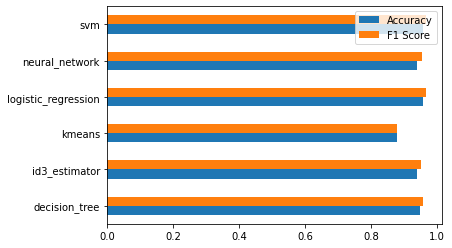

In [41]:
bc_accuracy_df = pd.DataFrame.from_dict(bc_accuracy_scores, orient='index')
bc_f1_df = pd.DataFrame.from_dict(bc_f1_scores, orient='index')
bc_scores = pd.concat([bc_accuracy_df, bc_f1_df], axis=1)
bc_scores.columns = ['Accuracy', 'F1 Score']

plt.figure()
bc_scores.plot(kind="barh")
plt.show()

Berdasarkan bar horizontal tersebut, dari beberapa algoritma yang digunakan untuk training data Breast Cancer, dapat dilihat bahwa algoritma SVM memberikan Accuracy Score dan F1 Score terbaik, yaitu 1.0. Sedangkan algoritma dengan Accuracy Score dan F1 Score terendah adalah K-Means dengan skor 0.87.  
Oleh karena itu, algoritma SVM adalah algoritma paling cocok untuk training data Breast Cancer dari beberapa algoritma yang ada.

<Figure size 432x288 with 0 Axes>

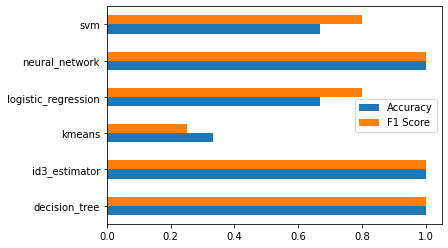

In [42]:
pt_accuracy_df = pd.DataFrame.from_dict(pt_accuracy_scores, orient='index')
pt_f1_df = pd.DataFrame.from_dict(pt_f1_scores, orient='index')
pt_scores = pd.concat([pt_accuracy_df, pt_f1_df], axis=1)
pt_scores.columns = ['Accuracy', 'F1 Score']

plt.figure()
pt_scores.plot(kind="barh")
plt.show()

Berdasarkan bar horizonal di atas, dari beberapa algoritma yang digunakan untuk training data Play Tennis, dapat dilihat bahwa algoritma Decision Tree Classifier, Id3 Estimator, dan Neural Network memberikan Accuracy Score dan F1 Score terbaik. Sedangkan algoritma dengan Accuracy Score dan F1 Score terburuk adalah K-Means dengan skor masing-masing 0.33 dan 0.25.  
Oleh karena itu, algoritma Decision Tree Classifier, Id3 Estimator, dan Neural Network adalah algoritma paling cocok untuk training data Play Tennis dari beberapa algoritma yang ada.

## Kesimpulan
Secara rata-rata, skor algoritma yang diimplementasikan untuk mempelajari dataset Breast Cancer lebih tinggi daripada skor terhadap dataset Play Tennis. Hal ini salah satunya disebabkan oleh jumlah instance pada dataset Breast Cancer yang jauh lebih besar daripada Play Tennis, yaitu 569 : 14.  
Selain itu, dataset yang sedikit juga memungkinkan terjadinya overfitting. Hal ini dapat dilihat dengan adanya beberapa hasil tes pada dataset Play Tennis yang memiliki akurasi sebesar 100%.

Made by: 
- 13519107 -- Daffa Ananda Pratama Resyaly 
(4,5,6 breast cancer dataset & 1,2,3 play tennis dataset)
- 13519113 -- Raihan Astrada Fathurrahman 
(1,2,3 breast cancer dataset  & 4,5,6 play tennis dataset)